### Import libraries

In [243]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 

### Load data modeling Libraries

In [244]:
#Common Model Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

#Common Model Helpers
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
%config InlineBackend.figure_format='retina'

### Getting familiar to data

In [245]:
data = pd.read_csv('dataset_diabetes/diabetic_data.csv')

In [246]:
#preview data
data.info()
data.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [247]:
#checking shape of the dataset
data.shape

(101766, 50)

In [248]:
for col in data.columns:
    print(col, data[col].nunique())

encounter_id 101766
patient_nbr 71518
race 6
gender 3
age 10
weight 10
admission_type_id 8
discharge_disposition_id 26
admission_source_id 17
time_in_hospital 14
payer_code 18
medical_specialty 73
num_lab_procedures 118
num_procedures 7
num_medications 75
number_outpatient 39
number_emergency 33
number_inpatient 21
diag_1 717
diag_2 749
diag_3 790
number_diagnoses 16
max_glu_serum 4
A1Cresult 4
metformin 4
repaglinide 4
nateglinide 4
chlorpropamide 4
glimepiride 4
acetohexamide 2
glipizide 4
glyburide 4
tolbutamide 2
pioglitazone 4
rosiglitazone 4
acarbose 4
miglitol 4
troglitazone 2
tolazamide 3
examide 1
citoglipton 1
insulin 4
glyburide-metformin 4
glipizide-metformin 2
glimepiride-pioglitazone 2
metformin-rosiglitazone 2
metformin-pioglitazone 2
change 2
diabetesMed 2
readmitted 3


### Exploratory Data Analysis and Visualizations

Change target feature to binary classification

0    54864
1    46902
Name: readmitted, dtype: int64


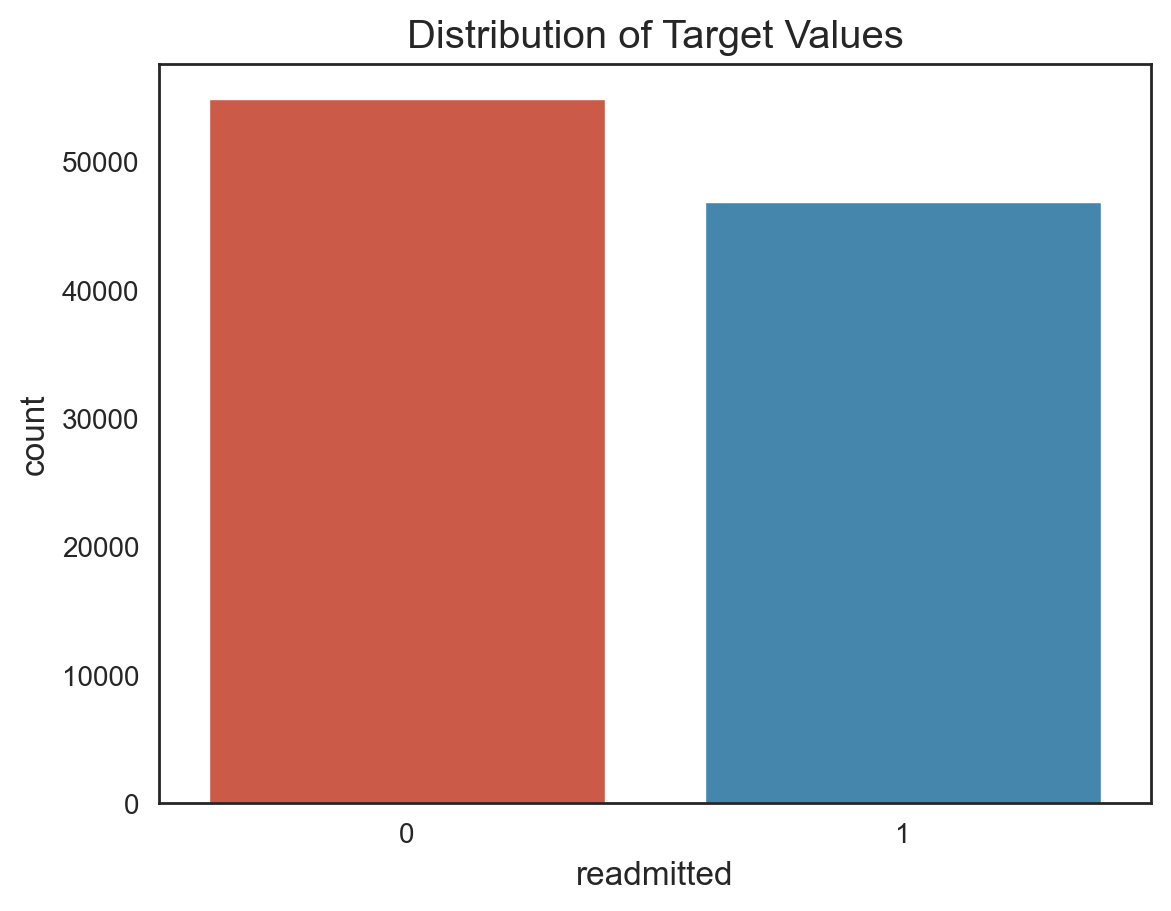

In [249]:
data = data.replace({"NO":0,
                         "<30":1,
                         ">30":1})

print(data.readmitted.value_counts())

sns.countplot(x = "readmitted", data = data)
plt.title("Distribution of Target Values")
plt.show()

Check the race

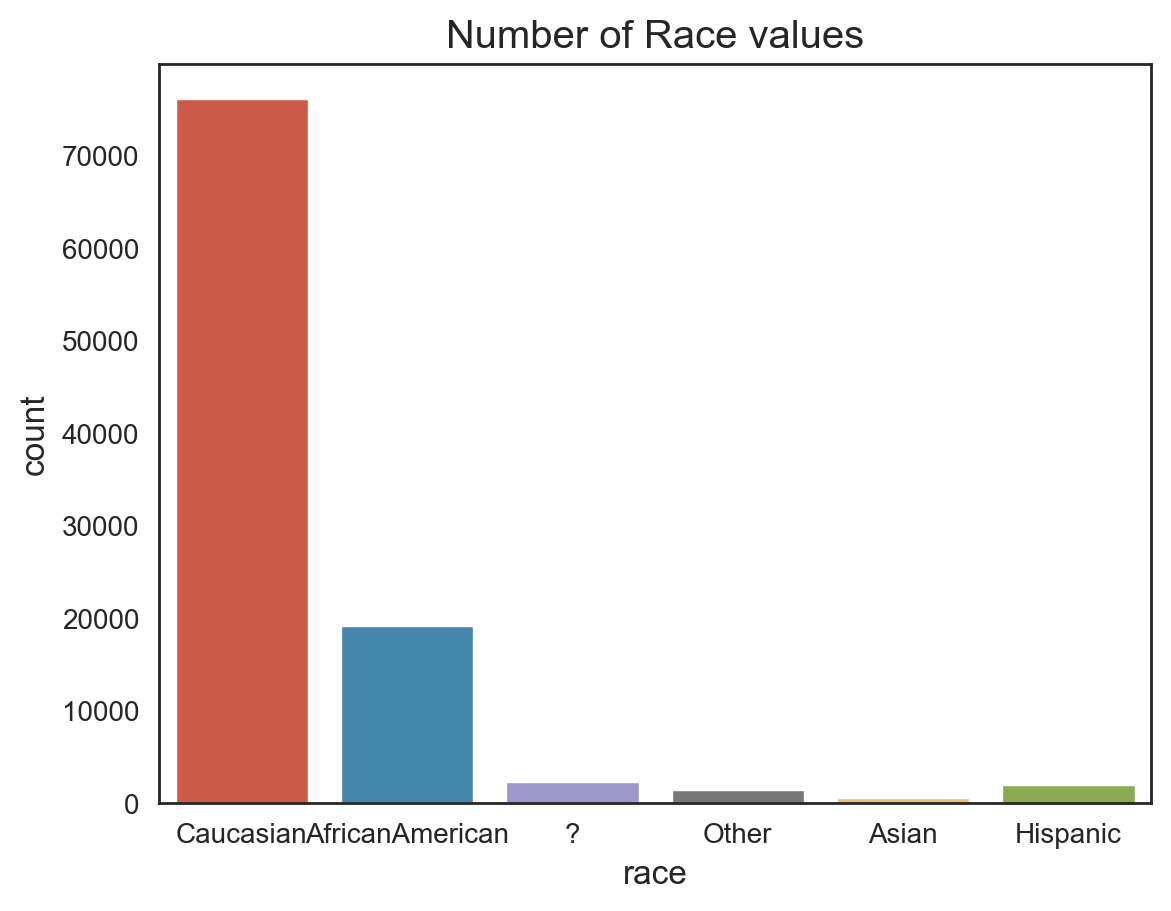

Proportion of Race
Caucasian          74.778413
AfricanAmerican    18.876639
?                   2.233555
Hispanic            2.001651
Other               1.479866
Asian               0.629876
Name: race, dtype: float64


In [250]:
sns.countplot(x=data.race, data = data)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(data.race.value_counts(normalize = True)*100)

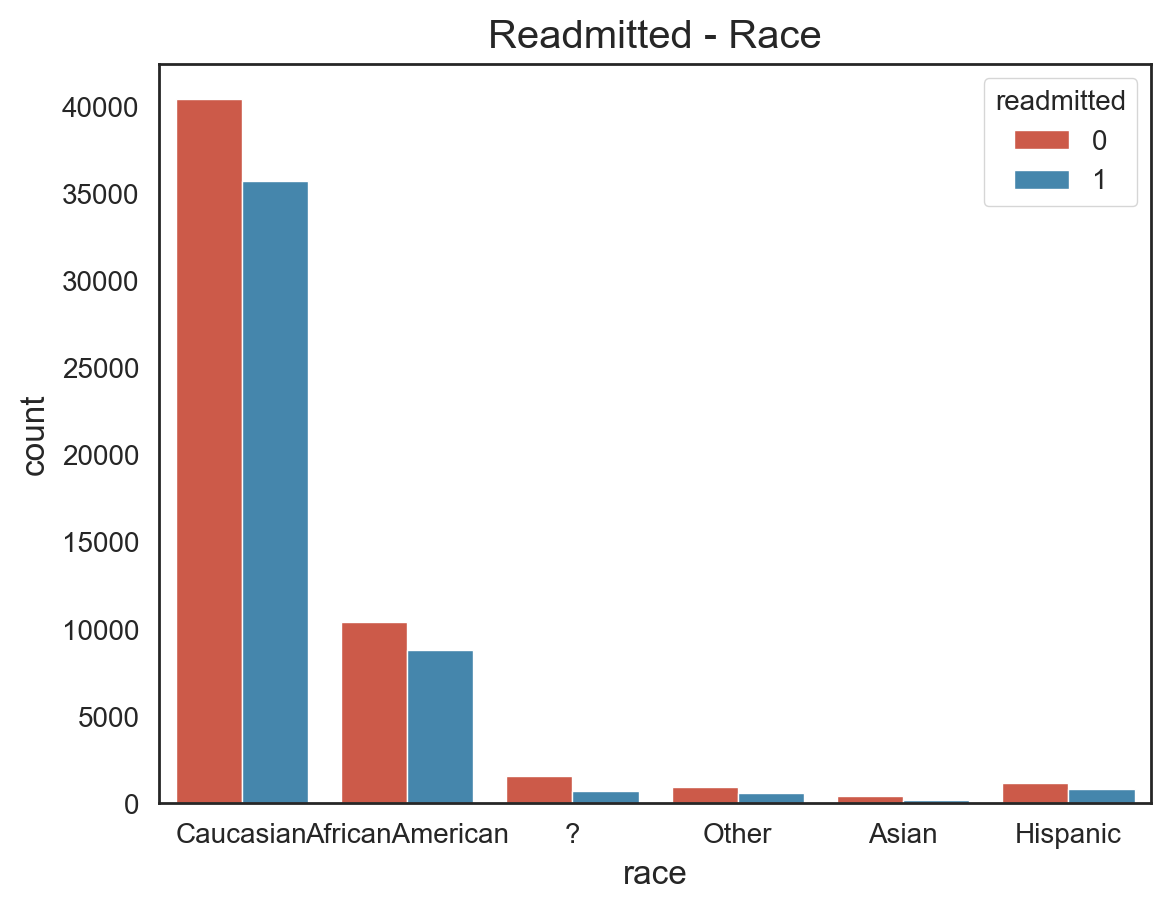

In [251]:
sns.countplot(x="race", hue= "readmitted", data = data)
plt.title("Readmitted - Race")
plt.show()

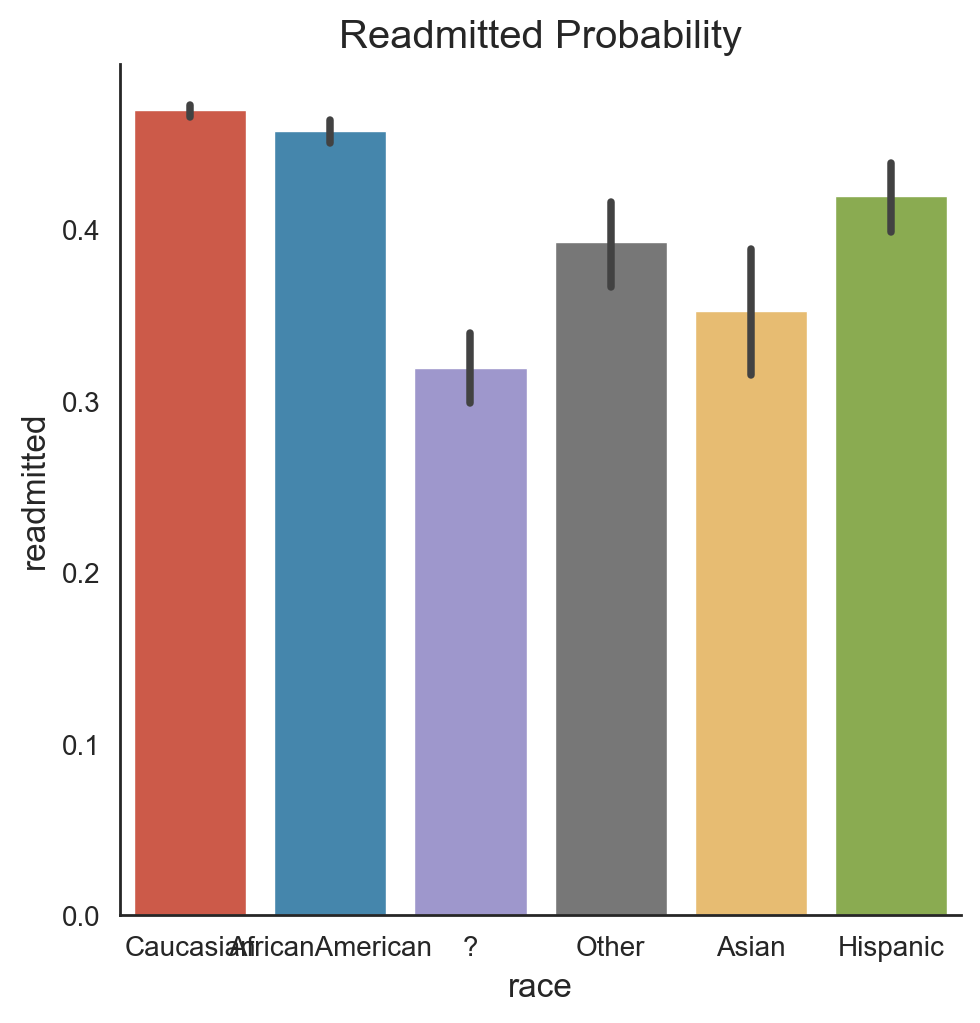

In [252]:
sns.catplot(x = "race", y = "readmitted",
            data = data, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

* Most of the patients are Caucasian, followed by African Americans.
* Although the Other values are few than Caucasian, we see that the Readmitted Probability almost close to Caucasian.

Gender

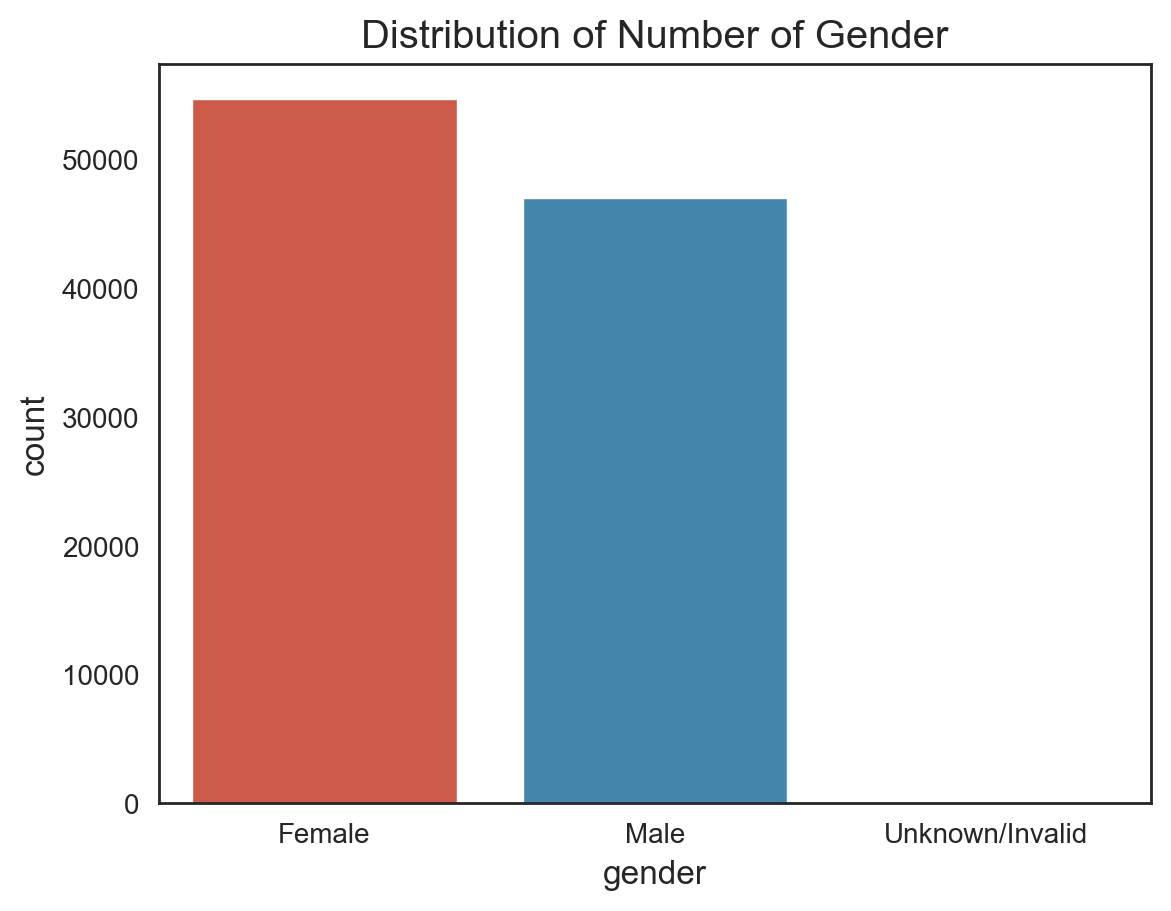

Proportions of gender Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


In [253]:
sns.countplot(x = "gender", data = data)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of gender Value")
print(data.gender.value_counts(normalize = True))

When we looked up Gender values, there are few entry for Unknown/Invalid. So we dropped them

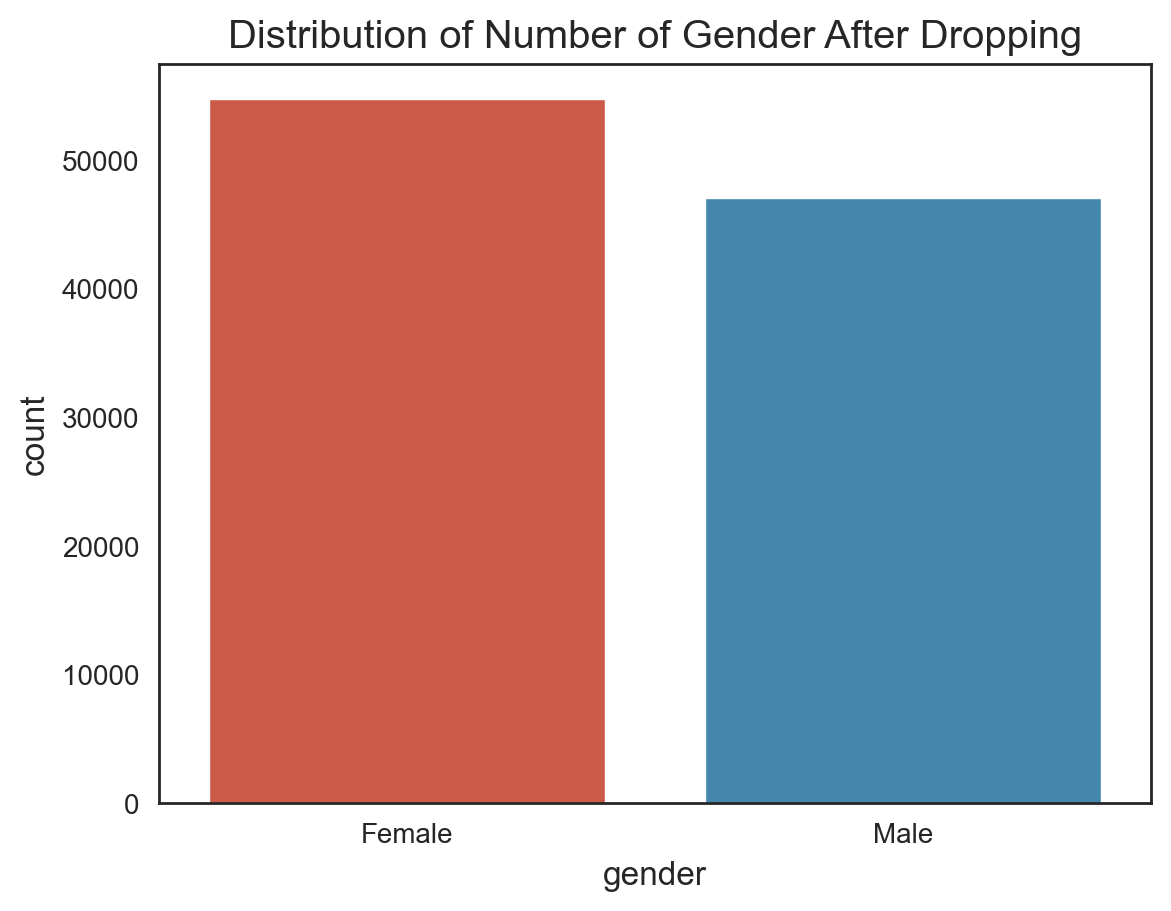

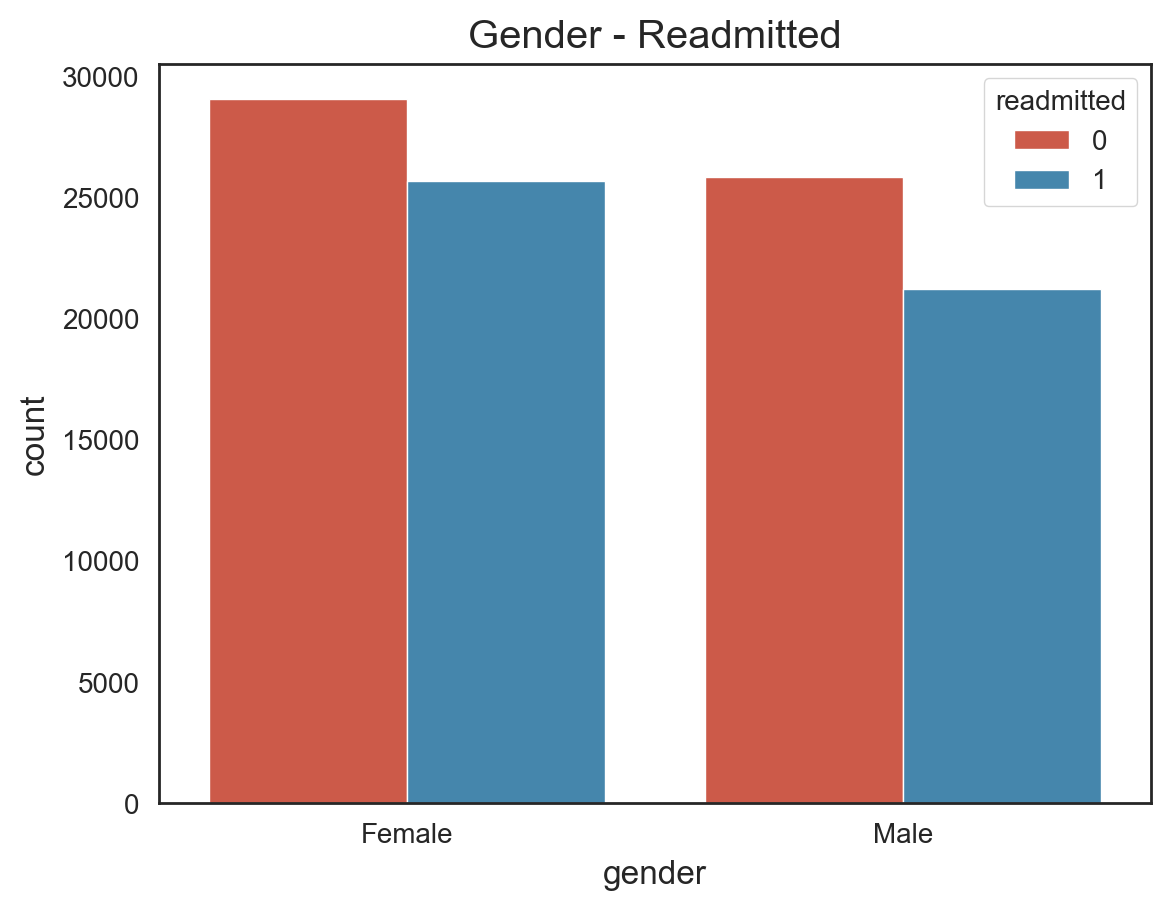

In [254]:
data = data.drop(data.loc[data["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = data)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = data)
plt.title("Gender - Readmitted")
plt.show()

Time in Hospital

C:\Users\amira\AppData\Local\Temp\ipykernel_3064\1800879557.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
C:\Users\amira\AppData\Local\Temp\ipykernel_3064\1800879557.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

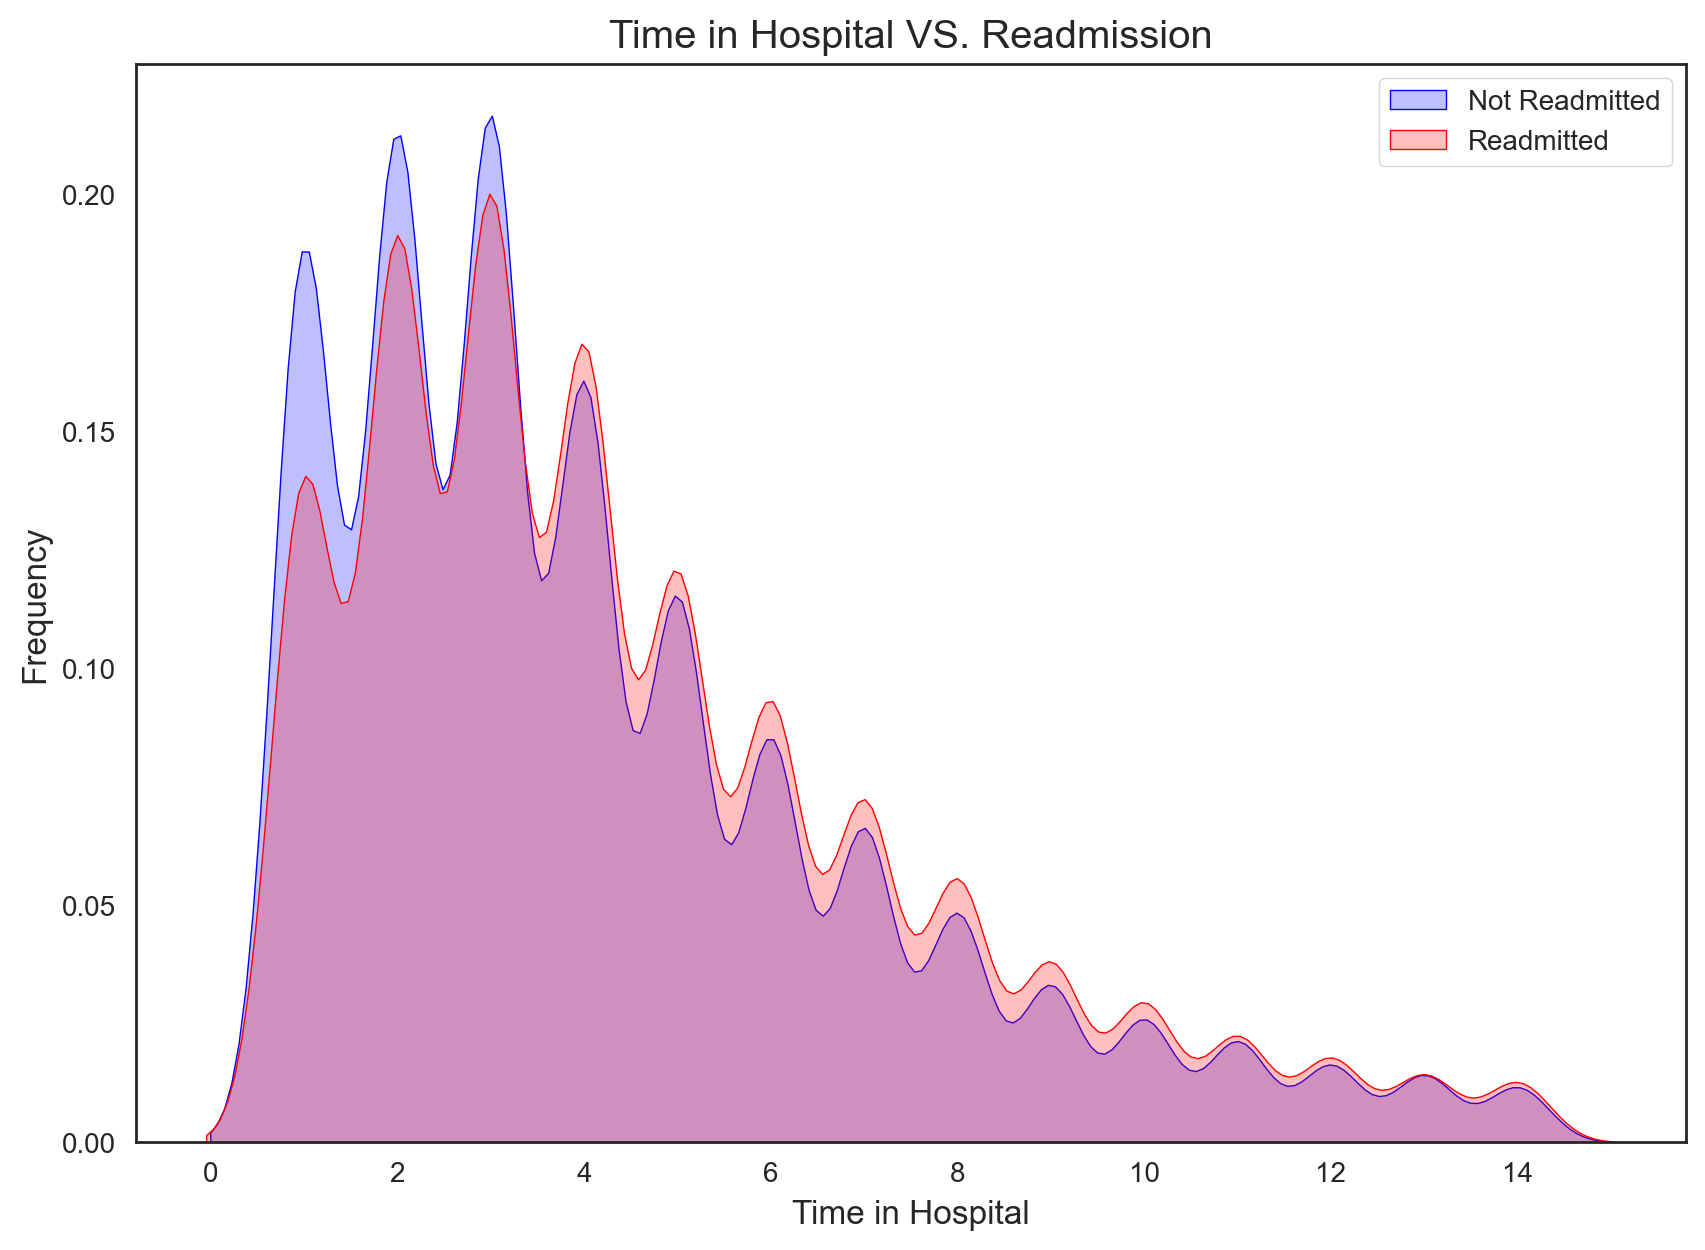

In [255]:
fig = plt.figure(figsize=(10,7),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.legend(loc="upper right")
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

Age

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

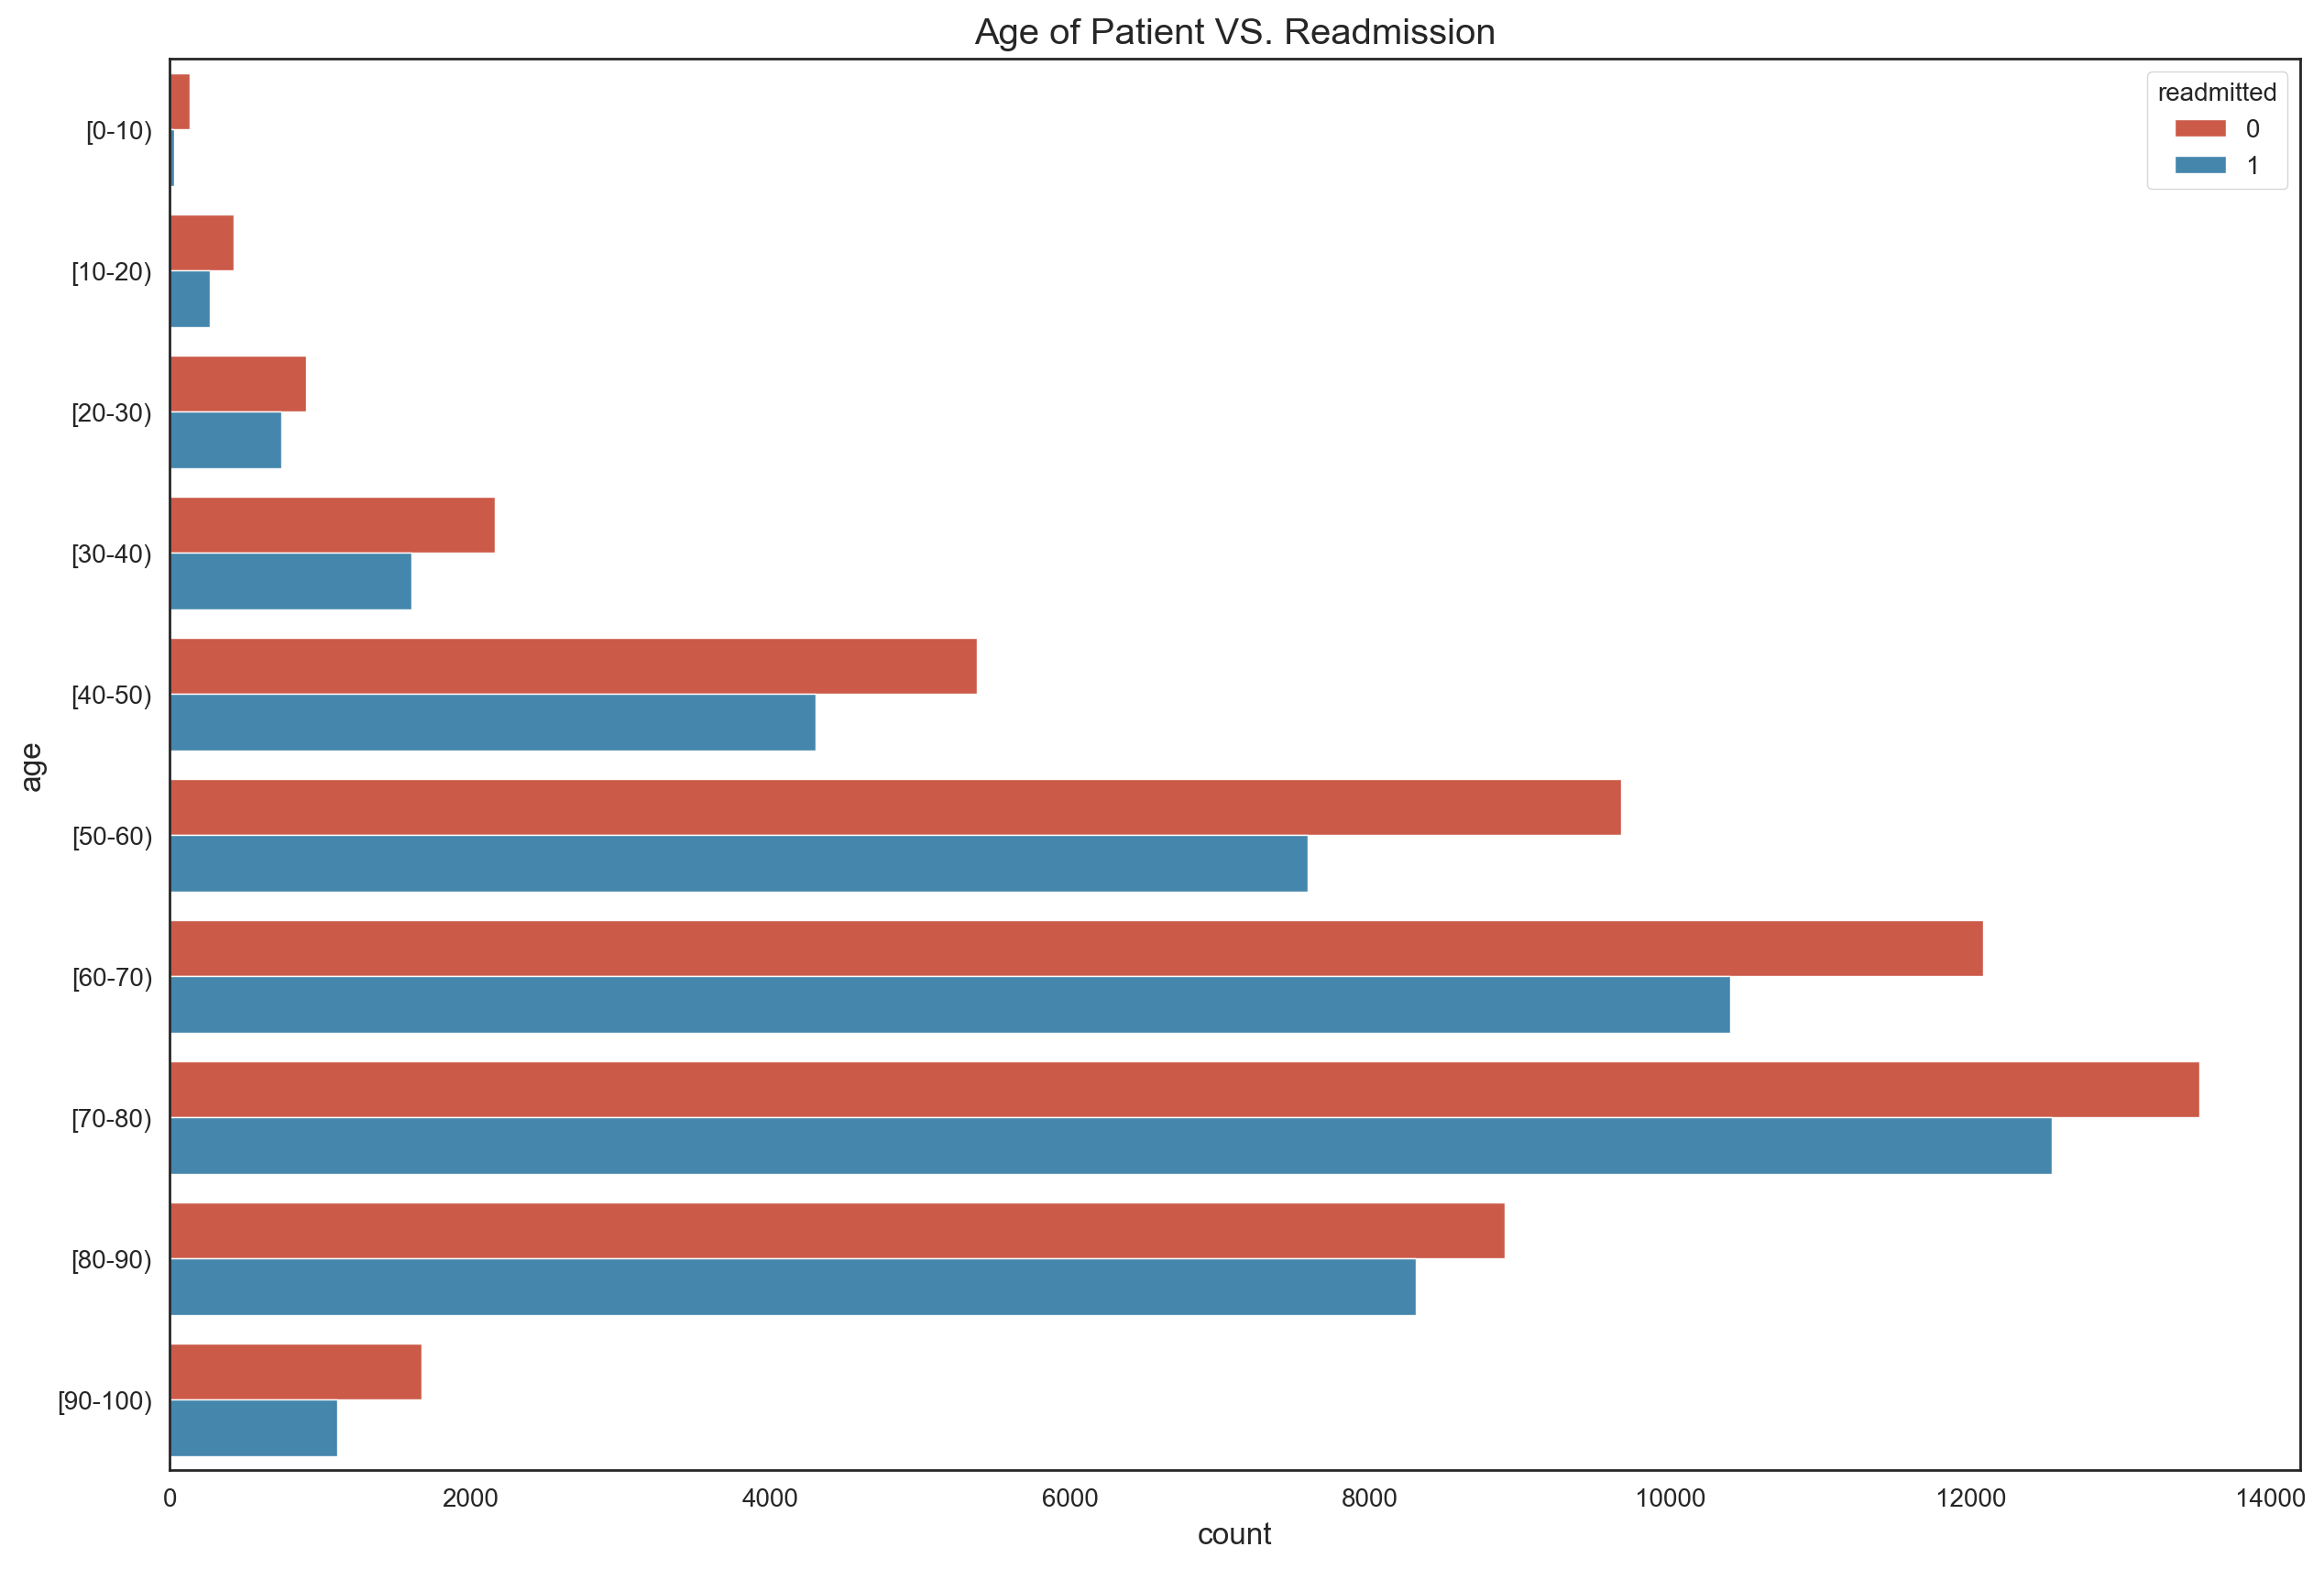

In [256]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= data['age'], hue = data['readmitted']).set_title('Age of Patient VS. Readmission')

Glucose serum test result

Text(0.5, 1.0, 'Glucose test serum test result VS. Readmission')

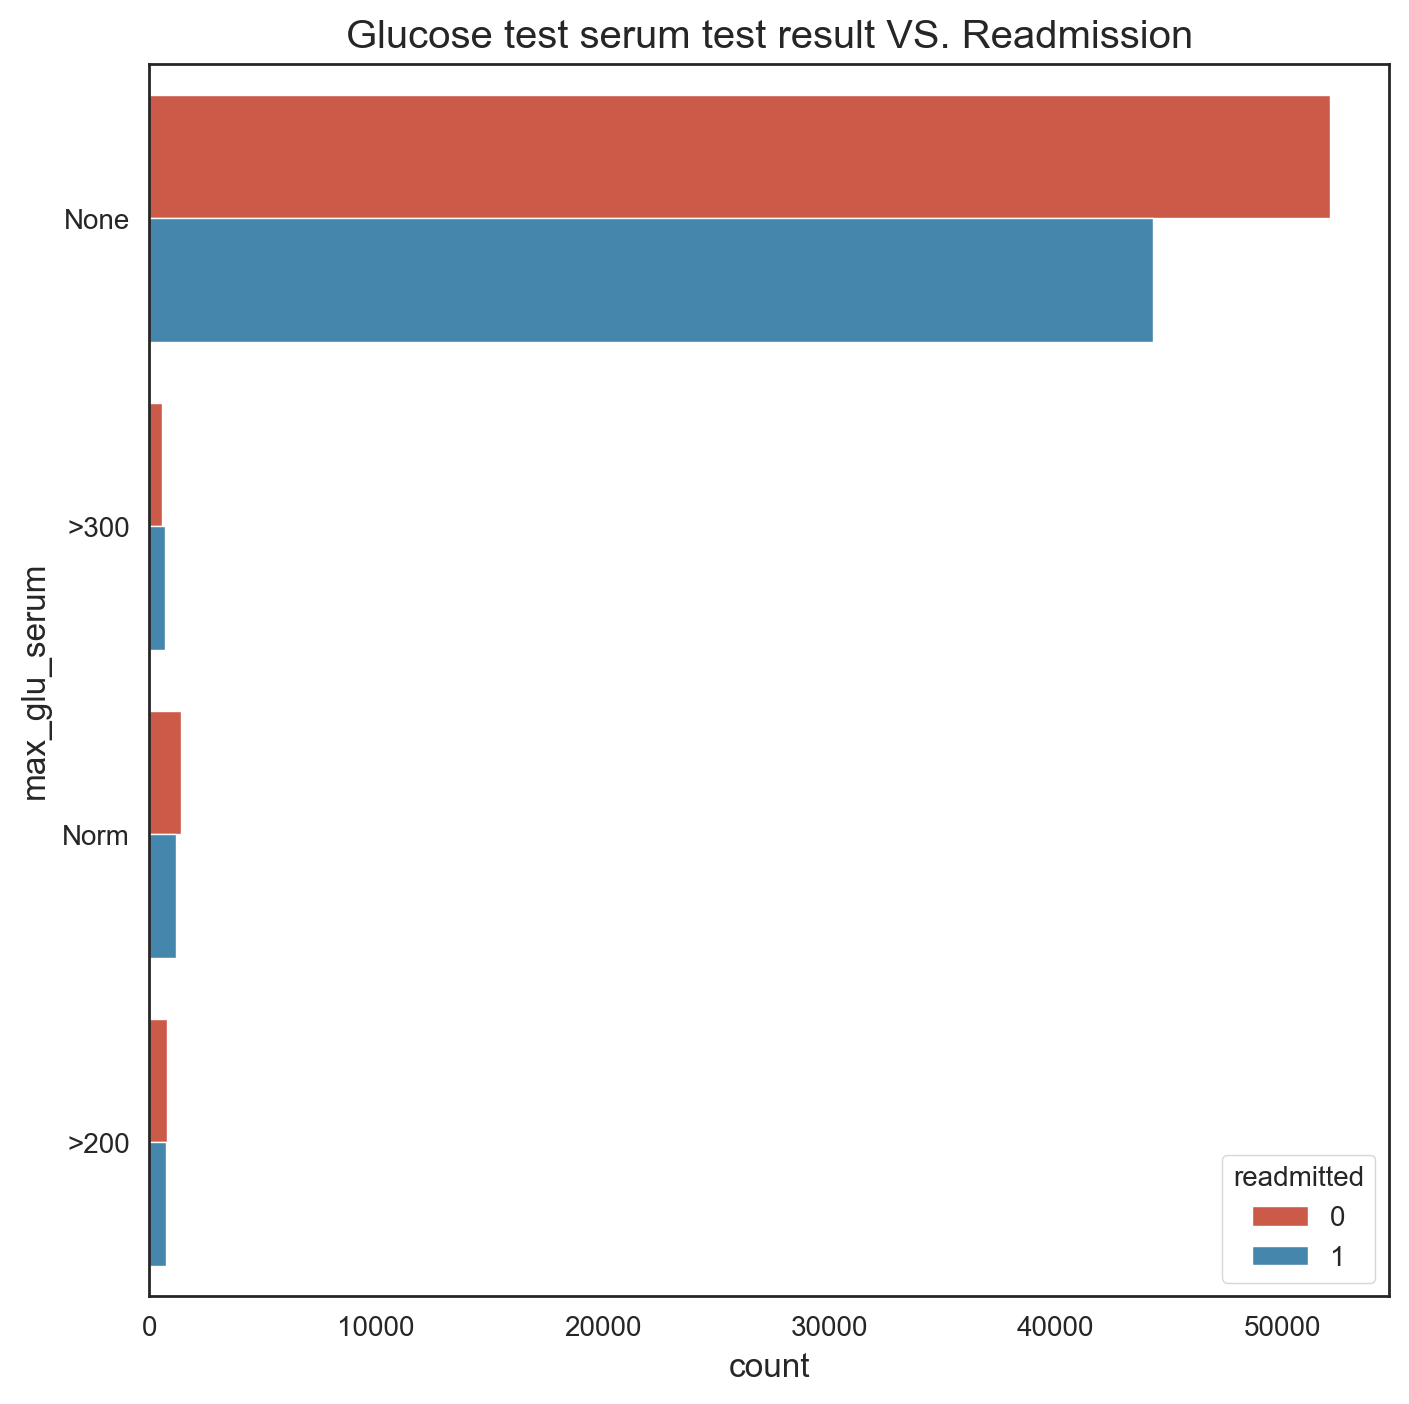

In [257]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = data['max_glu_serum'], hue = data['readmitted']).set_title('Glucose test serum test result VS. Readmission')

A1C result

Text(0.5, 1.0, 'A1C test result VS. Readmission')

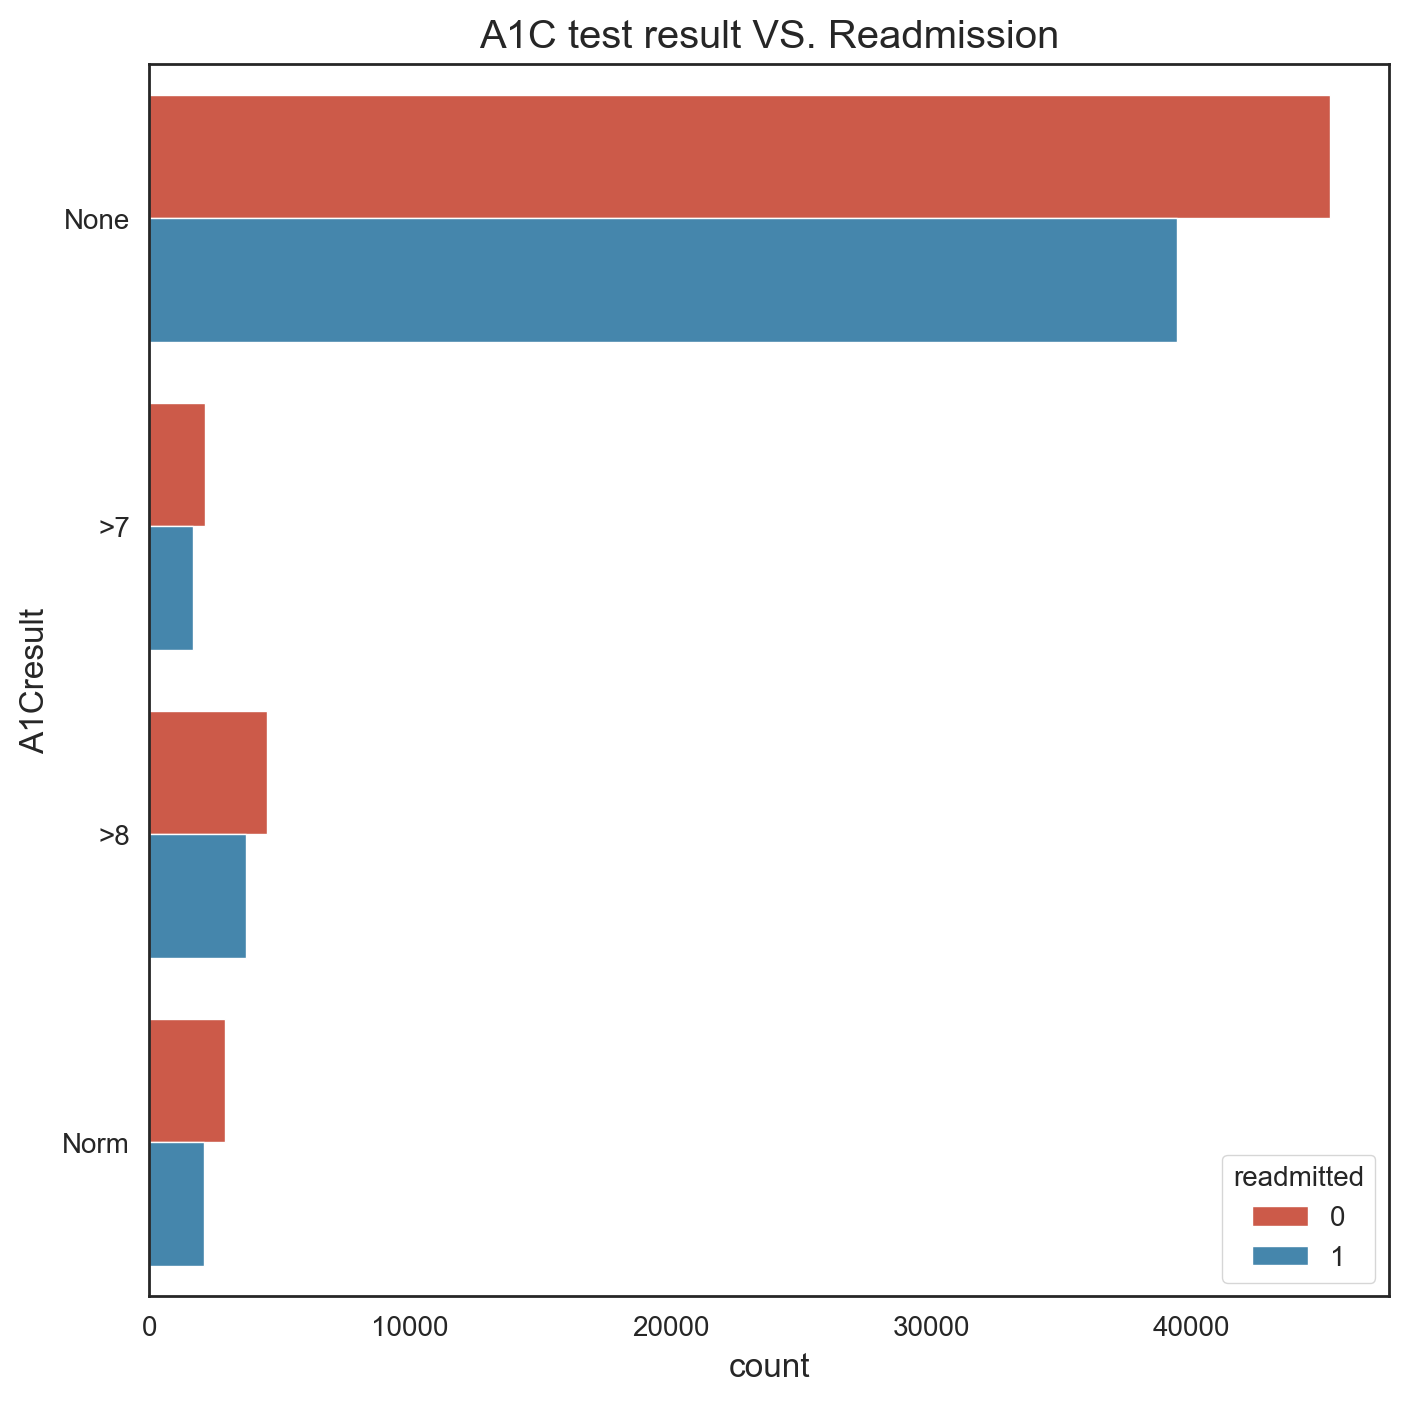

In [258]:
fig = sns.countplot(y= data['A1Cresult'], hue = data['readmitted']).set_title('A1C test result VS. Readmission').figure(figsize=(8,8))


Number of lab procedure

C:\Users\amira\AppData\Local\Temp\ipykernel_3064\164210254.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
C:\Users\amira\AppData\Local\Temp\ipykernel_3064\164210254.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')


Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

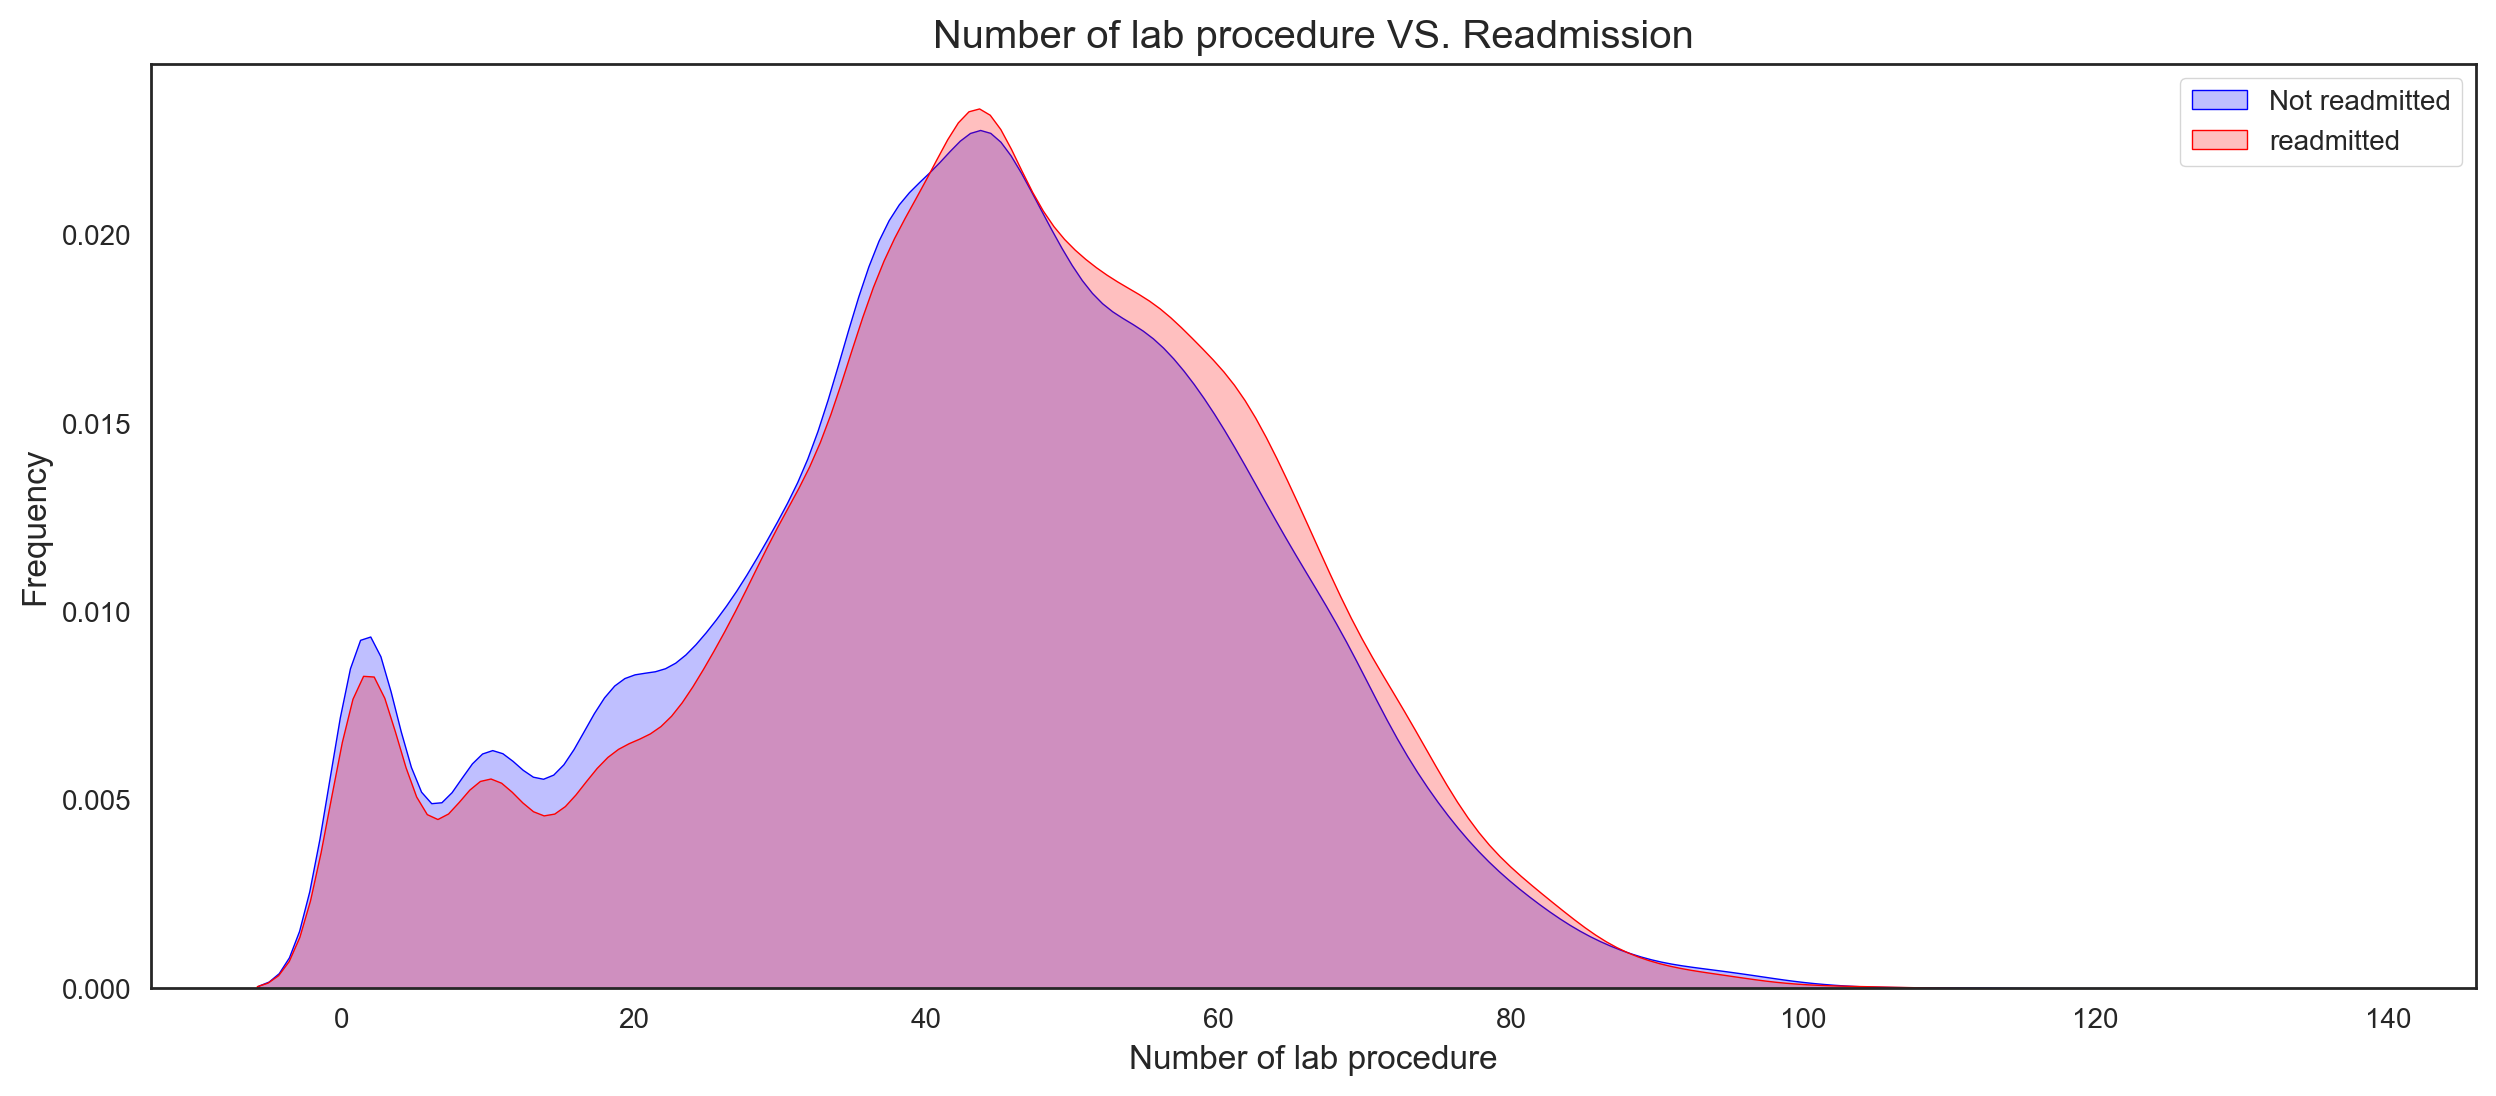

In [259]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(data.loc[(data['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(data.loc[(data['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
ax.legend(loc="upper right")
plt.title('Number of lab procedure VS. Readmission')

### Checking for missing values in dataset


In the dataset missing values are represented as '?' sign

In [260]:
for col in data.columns:
    print(col,data[col][data[col] == '?'].count())

encounter_id 0
patient_nbr 0
race 2271
gender 0
age 0
weight 98566
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40255
medical_specialty 49947
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Variable weight contains approximate 98% of the missing values so there is no significance in filling those missing values so we decided to drop these variables. Variable Payer code and medical specialty contains approximate 40% missing values so we also dropped these variables. 

In [261]:
#dropping columns with large number of missing values
data = data.drop(['weight','payer_code','medical_specialty'], axis = 1)

variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

In [262]:
data = data.drop(['citoglipton', 'examide'], axis = 1)

Because number of distinct values of attributes are not low, we can't use replacing method for missing values.
Also with respect to content of four other attributes that still have missed value, we can't use estimation for filling them.
so we replace missing value of diag and race with their mode:

In [263]:
data = data.replace("?",np.nan)

In [264]:
data.isna().sum()

encounter_id                   0
patient_nbr                    0
race                        2271
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazo

In [265]:
data['diag_1']

0         250.83
1            276
2            648
3              8
4            197
           ...  
101761    250.13
101762       560
101763        38
101764       996
101765       530
Name: diag_1, Length: 101763, dtype: object

In [266]:
data['diag_1'] = data['diag_1'].fillna(data['diag_1'].mode()[0])
data['diag_2'] = data['diag_2'].fillna(data['diag_2'].mode()[0])
data['diag_3'] = data['diag_3'].fillna(data['diag_3'].mode()[0])
data['race'] = data['race'].fillna(data['race'].mode()[0])

In [267]:
data.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

### Feature Engineering

'encounter_id' and 'patient_nbr' are not needed for our classification and are only identification numbers

In [268]:
data.drop(['encounter_id','patient_nbr'], axis = 1, inplace = True)

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization (see figure below). The idea was to see which version gives us better results. Granted, we did not apply any special weighting to the three ingredients of service utilization but we wanted to try something simple at this stage.

In [269]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission seems to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [270]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    data[colname] = data[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
data['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    data['numchange'] = data['numchange'] + data[colname]
    del data[colname]
    
data['numchange'].value_counts()  

0    74060
1    26272
2     1318
3      108
4        5
Name: numchange, dtype: int64

In [271]:
data['admission_type_id'].value_counts()

1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

re-encoding admission type, discharge type and admission source into fewer categories


In [272]:
# All of these replaces are logical regardless to these three feature values
# (I wrote one of these lines comment for example, all others can be explained same as this one)

data['admission_type_id'] = data['admission_type_id'].replace(2,1)   # 'Urgent' and 'Emergency' are not very differrent so we can have same number for both
data['admission_type_id'] = data['admission_type_id'].replace(7,1)
data['admission_type_id'] = data['admission_type_id'].replace(6,5)
data['admission_type_id'] = data['admission_type_id'].replace(8,5)

data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(6,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(8,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(9,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(13,1)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(3,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(4,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(5,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(14,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(22,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(23,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(24,2)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(12,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(15,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(16,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(17,10)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(25,18)
data['discharge_disposition_id'] = data['discharge_disposition_id'].replace(26,18)

data['admission_source_id'] = data['admission_source_id'].replace(2,1)
data['admission_source_id'] = data['admission_source_id'].replace(3,1)
data['admission_source_id'] = data['admission_source_id'].replace(5,4)
data['admission_source_id'] = data['admission_source_id'].replace(6,4)
data['admission_source_id'] = data['admission_source_id'].replace(10,4)
data['admission_source_id'] = data['admission_source_id'].replace(22,4)
data['admission_source_id'] = data['admission_source_id'].replace(25,4)
data['admission_source_id'] = data['admission_source_id'].replace(15,9)
data['admission_source_id'] = data['admission_source_id'].replace(17,9)
data['admission_source_id'] = data['admission_source_id'].replace(20,9)
data['admission_source_id'] = data['admission_source_id'].replace(21,9)
data['admission_source_id'] = data['admission_source_id'].replace(13,11)
data['admission_source_id'] = data['admission_source_id'].replace(14,11)

Encoding some variables: The original dataset used string values for gender, race, medication change, and each of the 23 drugs used. To better fit those variables into our model, we interpret the variables to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [273]:
data['change'] = data['change'].replace('Ch', 1)
data['change'] = data['change'].replace('No', 0)
data['gender'] = data['gender'].replace('Male', 1)
data['gender'] = data['gender'].replace('Female', 0)
data['diabetesMed'] = data['diabetesMed'].replace('Yes', 1)
data['diabetesMed'] = data['diabetesMed'].replace('No', 0)
# keys is the same as before
for col in keys:
    data[col] = data[col].replace('No', 0)
    data[col] = data[col].replace('Steady', 1)
    data[col] = data[col].replace('Up', 1)
    data[col] = data[col].replace('Down', 1)

We also reduced both A1C test result and Glucose serum test result into categories of Normal, Abnormal and Not tested.

In [274]:
data['A1Cresult'] = data['A1Cresult'].replace('>7', 1)
data['A1Cresult'] = data['A1Cresult'].replace('>8', 1)
data['A1Cresult'] = data['A1Cresult'].replace('Norm', 0)
data['A1Cresult'] = data['A1Cresult'].replace('None', -1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>200', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('>300', 1)
data['max_glu_serum'] = data['max_glu_serum'].replace('Norm', 0)
data['max_glu_serum'] = data['max_glu_serum'].replace('None', -1)

Dealing with age: There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, we assume that age of the patient on average lies at the midpoint of the age category. For example, if the patient’s age category is 20–30 years, then we assume the age = 25 years. So we converted age categories to midpoints, resulting in a numeric variable:

In [275]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    data['age'] = data['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', 5*(2*i+1))
data['age'].value_counts()

75    26066
65    22482
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

In [276]:
data['age']

0          5
1         15
2         25
3         35
4         45
          ..
101761    75
101762    85
101763    75
101764    85
101765    75
Name: age, Length: 101763, dtype: int64

In [277]:
x = data.drop('readmitted', axis = 1)
y = data['readmitted']
print(x)
print(y)

                   race  gender  age  admission_type_id  \
0             Caucasian       0    5                  5   
1             Caucasian       0   15                  1   
2       AfricanAmerican       0   25                  1   
3             Caucasian       1   35                  1   
4             Caucasian       1   45                  1   
...                 ...     ...  ...                ...   
101761  AfricanAmerican       1   75                  1   
101762  AfricanAmerican       0   85                  1   
101763        Caucasian       1   75                  1   
101764        Caucasian       0   85                  1   
101765        Caucasian       1   75                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             18                    1                 1   
1                              1                    7                 3   
2                              1                    7             

encode variables with ordinal encoding

In [278]:
cols = data.columns
num_cols = data._get_numeric_data().columns
non_num_cols = list(set(cols) - set(num_cols))
print(non_num_cols)

encoder = ce.OrdinalEncoder(non_num_cols)

x = encoder.fit_transform(x)


['race', 'diag_2', 'diag_3', 'diag_1']


In [279]:
x.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,service_utilization,numchange
0,1,0,5,5,18,1,1,41,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,15,1,1,7,3,59,0,18,...,1,0,0,0,0,0,1,1,0,1
2,2,0,25,1,1,7,2,11,5,13,...,0,0,0,0,0,0,0,1,3,0
3,1,1,35,1,1,7,2,44,1,16,...,1,0,0,0,0,0,1,1,0,1
4,1,1,45,1,1,7,1,51,0,8,...,1,0,0,0,0,0,1,1,0,0


 Standardizing the data

In [280]:
scaler = StandardScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
scaled_data = pd.DataFrame(scaled_features, columns = x.columns)
x = scaled_data

### Modeling

Train_test splitting

In [281]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Classification => Decision tree

In [282]:
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [283]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,1241,929,2170
1,1040,884,1924
All,2281,1813,4094


In [284]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)
precision_dtree = precision_score(y_test, dtree_pred)
recall_dtree = recall_score(y_test, dtree_pred)

Accuracy is 0.57
Precision is 0.53
Recall is 0.52


                     Feature  Importance
4   discharge_disposition_id    0.037179
8             num_procedures    0.038960
2                        age    0.039884
6           time_in_hospital    0.058200
42       service_utilization    0.063049
9            num_medications    0.092712
14                    diag_2    0.105876
13                    diag_1    0.108546
15                    diag_3    0.108852
7         num_lab_procedures    0.118532


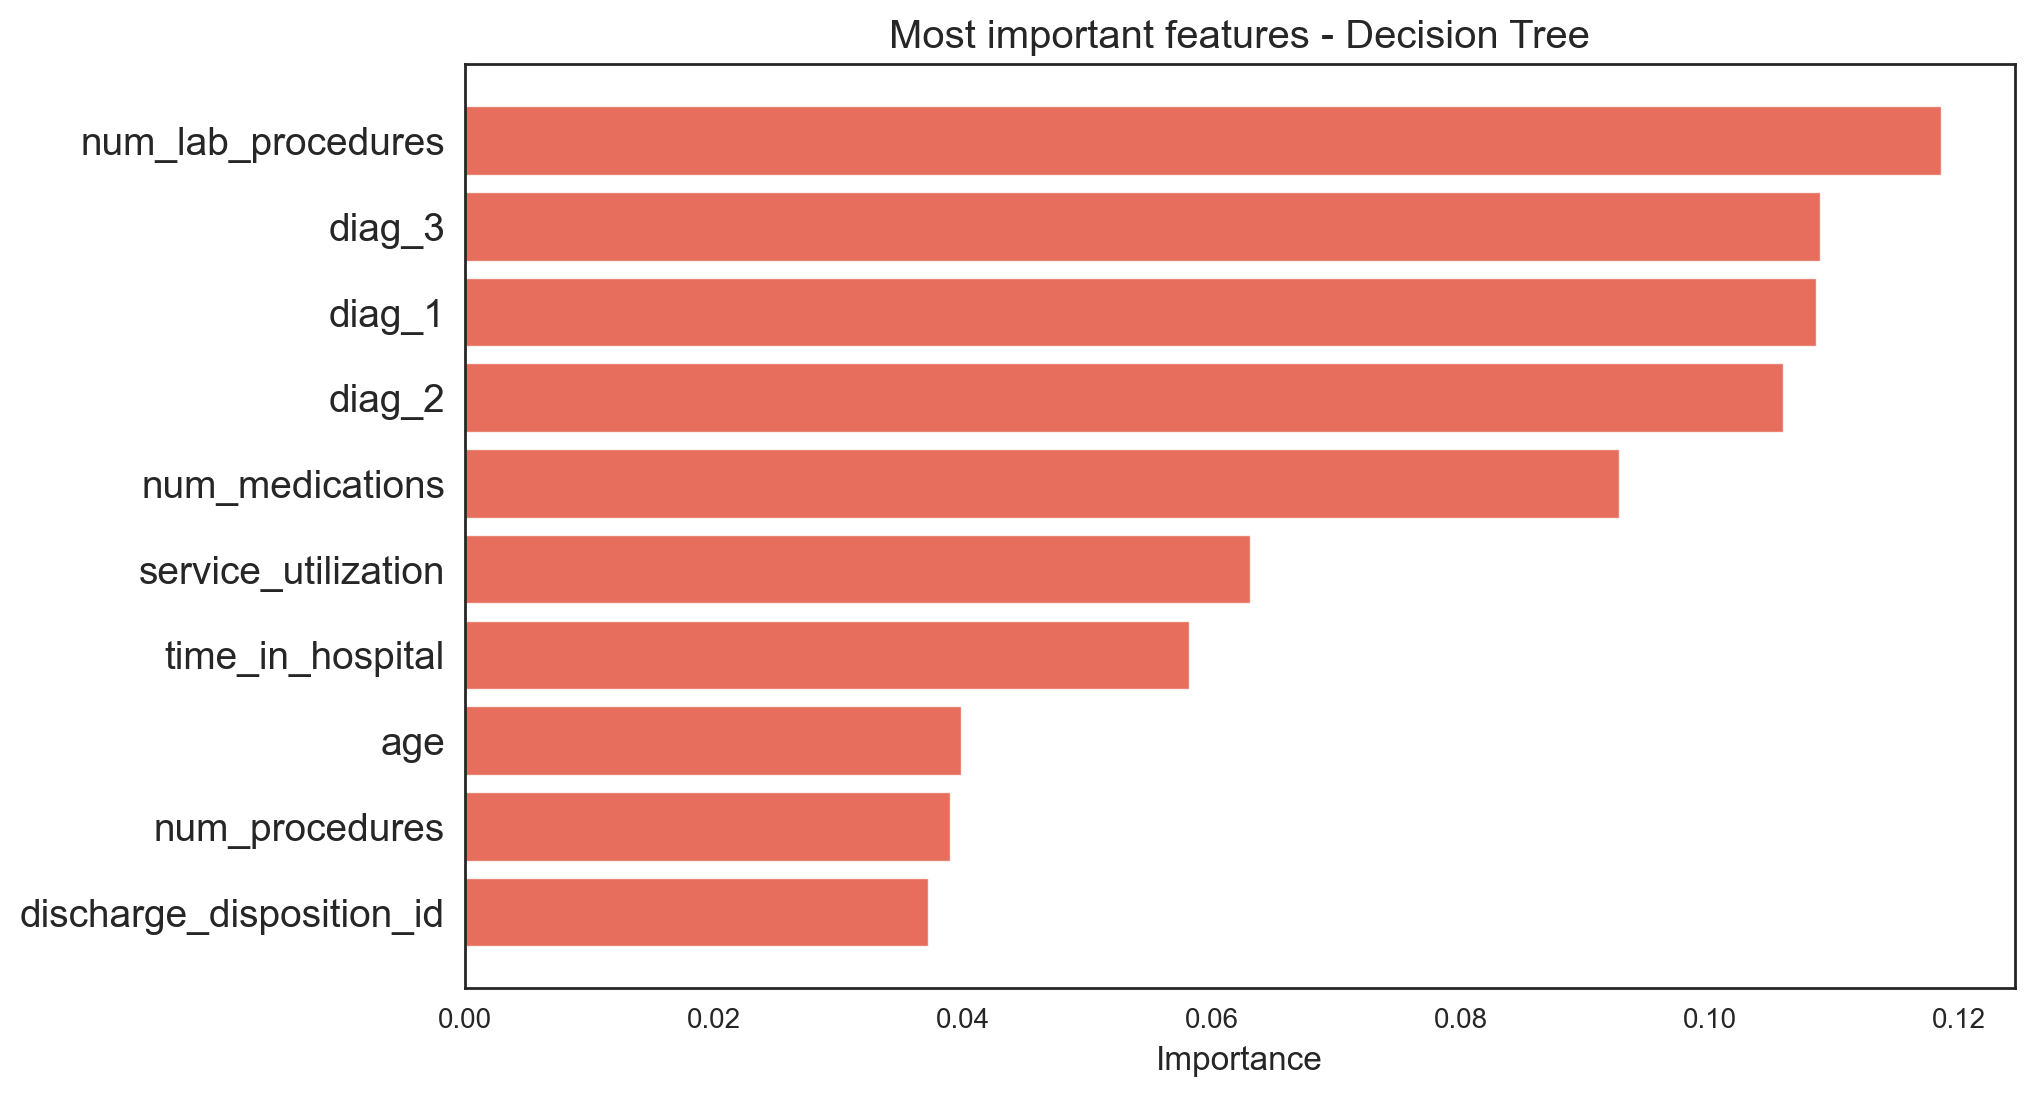

In [285]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

### Clustering => K-means

In [286]:
model = KMeans(n_clusters=2, random_state=42) 
diabet_kmeans = model.fit(x)

C:\Users\amira\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [287]:
diabet_kmeans.labels_

array([1, 0, 1, ..., 0, 0, 1])

In [288]:
diabet_kmeans.cluster_centers_

array([[ 6.22972221e-03,  1.64071263e-02, -4.03931127e-02,
         1.17758319e-02, -6.75100138e-02,  6.53188909e-03,
         1.23000455e-01,  7.27108751e-02,  9.32959008e-03,
         2.75019140e-01,  3.07206496e-02,  5.20952299e-02,
         2.89722543e-02, -5.05908753e-03,  1.30164503e-02,
         8.15855060e-03,  5.86423379e-02,  8.12105214e-03,
         1.10004497e-01,  3.47451855e-01,  8.09313164e-02,
         5.86816836e-02, -1.30287569e-02,  1.48843680e-01,
         3.62966926e-03,  2.11488520e-01,  1.90539184e-01,
        -9.29127704e-04,  2.16858481e-01,  2.09815757e-01,
         4.95138896e-02,  1.57936233e-02,  6.28683336e-03,
         2.08726782e-03,  5.55095093e-01,  4.59400168e-02,
         9.33526728e-03,  3.62966926e-03,  5.13315272e-03,
         3.62966926e-03,  1.07251825e+00,  5.46432416e-01,
         5.41031864e-02,  6.82649525e-01],
       [-5.38032873e-03, -1.41700914e-02,  3.48857007e-02,
        -1.01702523e-02,  5.83053392e-02, -5.64129656e-03,
        -1.06

In [289]:
pd.crosstab(pd.Series(y, name = 'Actual'), pd.Series(diabet_kmeans.labels_, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,25093,29765,54858
1,22047,24855,46902
All,47140,54620,101760


In [290]:
print("Accuracy is {0:.2f}".format(accuracy_score(y, diabet_kmeans.labels_)))
print("Precision is {0:.2f}".format(precision_score(y, diabet_kmeans.labels_)))
print("Recall is {0:.2f}".format(recall_score(y, diabet_kmeans.labels_)))

Accuracy_Kmeans = accuracy_score(y, diabet_kmeans.labels_)
Precision_Kmeans = precision_score(y, diabet_kmeans.labels_)
Recall_kmeans = recall_score(y, diabet_kmeans.labels_)

Accuracy is 0.47
Precision is 0.44
Recall is 0.51


### Model Comparision

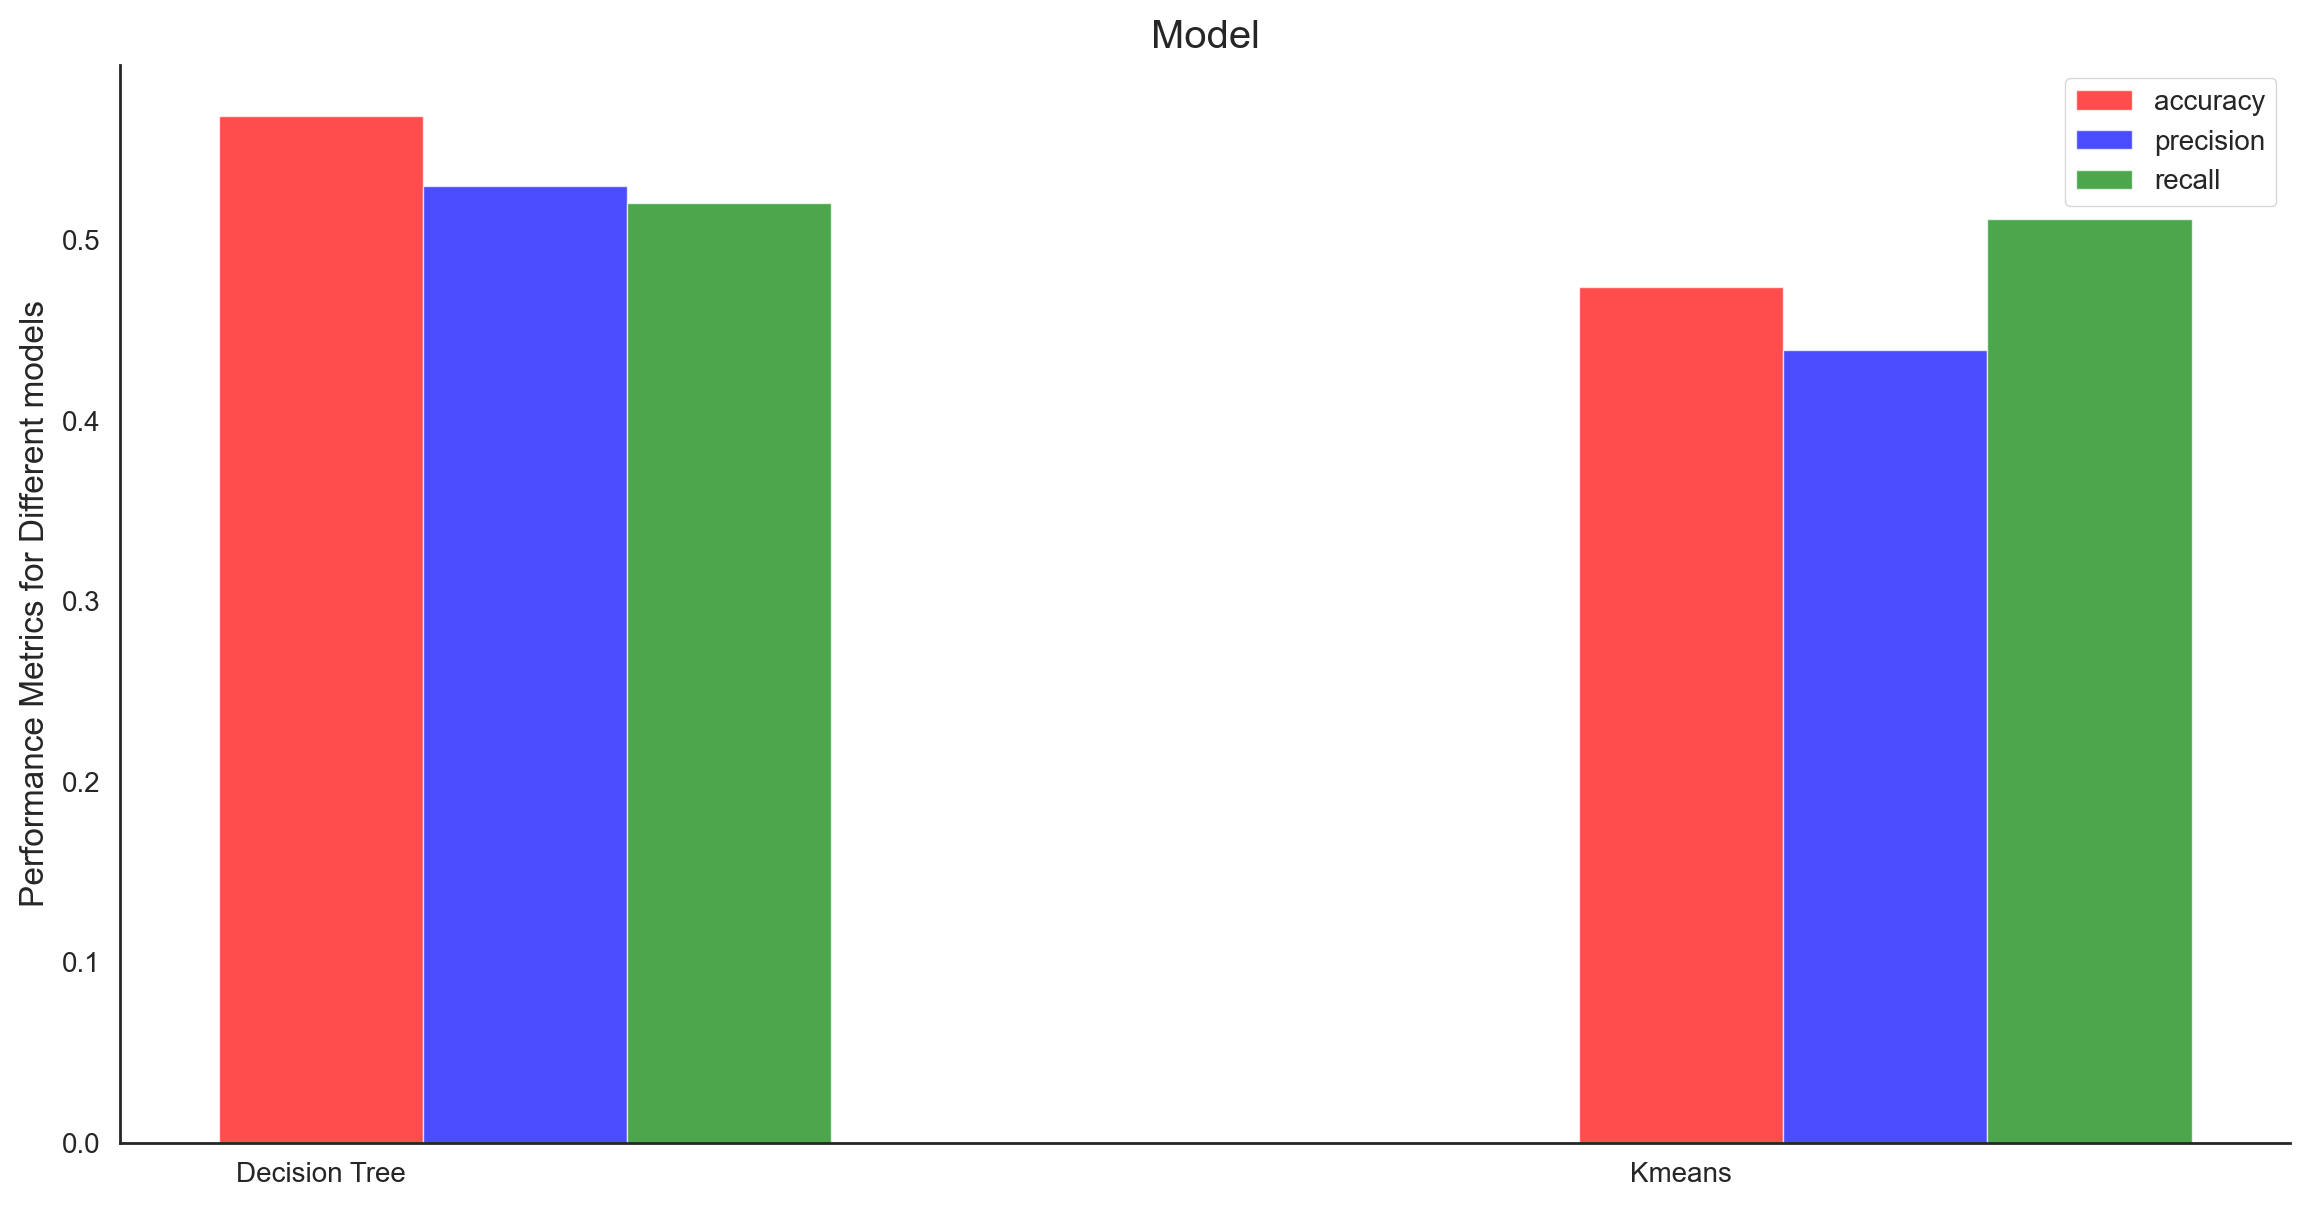

In [291]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Decision Tree', 'Kmeans']
values = [accuracy_dtree, Accuracy_Kmeans]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Decision Tree', 'Kmeans']
values = [precision_dtree, Precision_Kmeans]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['Decision Tree', 'Kmeans']
values = [recall_dtree, Recall_kmeans ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()